In [1]:
from datascience import *
import numpy as np

# Arrays

An array has to have elements of the same type.

In [2]:
my_arr = make_array(42.5, 5.11, 777)
my_arr

array([ 42.5 ,   5.11, 777.  ])

If we create an array of mixed types, Python will automatically force them all to be the same type. If an array contains even a single string, the entire resulting array will contain strings. 

In [3]:
my_arr = make_array(42, 5, 11, '8')
my_arr

array(['42', '5', '11', '8'], dtype='<U21')

Adding a single number to an array adds it to every element in that array. If an array contains a single element, it is as if that element is just a single value. We can verify it by creating a new array of integers and another array with a single integer.

In [4]:
arr2 = make_array(1, 5, 10, 0)
arr2

array([ 1,  5, 10,  0])

In [5]:
5 + arr2

array([ 6, 10, 15,  5])

In [6]:
arr1 = make_array(5)

In [7]:
arr1 + arr2

array([ 6, 10, 15,  5])

# Tables

`Table()` will return an empty table. Since we rarely want just an empty table, we usually use it together with the `with_columns` function to add column names ("labels") and corresponding values to our table.

In [8]:
empty_tbl = Table()
empty_tbl

In [9]:
type(empty_tbl)  # the type is supposed to be datascience.tables.Table

datascience.tables.Table

We can either use `Table()` again to create a new empty table or we can start with an empty table that we just stored in `empty_tbl`. Notice that if we use an existing table, we do not need to use the `Table()` function.

In [10]:
Table().with_columns('Tasks', 
                     make_array("Finish INT5 lab", 
                                "Do the dishes", 
                                "Buy snacks"))

Tasks
Finish INT5 lab
Do the dishes
Buy snacks


In [11]:
empty_tbl.with_columns('Tasks', 
                     make_array("Finish INT5 lab", 
                                "Do the dishes", 
                                "Buy snacks"))

Tasks
Finish INT5 lab
Do the dishes
Buy snacks


Let's save this table into `my_todo` and add a couple more columns to it to keep track of tasks' priorities and whether we've done them. Notice that we can either use `empty_tbl`, which we already created or `Table()` to create an empty table.

In [12]:
my_todo = Table().with_columns(
                    'Tasks', make_array("Finish INT5 lab", "Do the dishes", "Buy snacks"), # first column
                    'Priority', make_array(5, 3, 2), # second column
                    'Done', make_array(0, 1, 0) # third column
)

In [13]:
my_todo

Tasks,Priority,Done
Finish INT5 lab,5,0
Do the dishes,3,1
Buy snacks,2,0


We could have alternatively, created the arrays separately, and then added them to the table.

In [14]:
tasks = make_array("Finish INT5 lab", 
                   "Do the dishes", 
                   "Buy snacks")
tasks

array(['Finish INT5 lab', 'Do the dishes', 'Buy snacks'], dtype='<U15')

For each task above, let's add its priority: the higher the number, the more important the task.

In [15]:
priority_values = make_array(10, 4, 1)
priority_values

array([10,  4,  1])

Let's indicate if a task is done `1` or not `0`.

In [16]:
doneness = make_array(0, 1, 0)
doneness

array([0, 1, 0])

The table below looks just like the one we've created above.

In [17]:
empty_tbl.with_columns(
    "Tasks", tasks, # first column
    "Priority", priority_values, # second column
    "Done", doneness # third column
)

Tasks,Priority,Done
Finish INT5 lab,10,0
Do the dishes,4,1
Buy snacks,1,0


We also could have added the columns one at a time, instead of all at once. Notice, that we'll need to save the intermediate tables to be able to add more columns to them later. We'll start with the empty `todo` table but we also could have directly used the command that created it (`Table()`).

In [ ]:
empty_tbl # Table() empty table we created above

In [18]:
todo_tasks = Table().with_columns("Tasks", tasks) # first column
todo_tasks

Tasks
Finish INT5 lab
Do the dishes
Buy snacks


We are now going to add `priority_values` to the new table we just created (`todo_tasks`). Notice that instead of using the empty `todo` table to which we are adding columns, we are using `todo_tasks` to add the new column to it.

In [26]:
todo_tasks_pr = todo_tasks.with_column(
    "Priority", priority_values
) # second column
todo_tasks_pr

Tasks,Priority
Finish INT5 lab,10
Do the dishes,4
Buy snacks,1


In [21]:
empty_tbl

If we used just `todo` or `Table()` with the above command, we would have been adding a new column to an **empty table** and would have gotten back a table with just one column.

In [24]:
empty_tbl.with_columns('Priority', priority_values) 
# same as
Table().with_columns('Priority', priority_values) # preferred, since it is more explicit

Priority
10
4
1


Now, let's add the last column to our table to indicate if a task is done `1` or not `0`.

In [28]:
todo_all = todo_tasks_pr.with_columns(
    'Done', doneness) # third column
todo_all

Tasks,Priority,Done
Finish INT5 lab,10,0
Do the dishes,4,1
Buy snacks,1,0


Since the commands work with the result of the previous commands (i.e., adding to the table that was previously created), we could also chain them together to achieve the same effect but without the need for the names of intermediate tables.

In [30]:
Table().with_columns('Tasks', tasks).with_columns('Priority', priority_values)

Tasks,Priority
Finish INT5 lab,10
Do the dishes,4
Buy snacks,1


Note that `.num_rows`, `.num_columns`, and `.labels` are the only commands that we use that do not have `()` after them.

In [31]:
todo_all.num_rows

3

In [32]:
todo_all.labels

('Tasks', 'Priority', 'Done')

`relabeled` function leaves the original table intact and returns a new table with the specified column relabeled to a new name. To save that table, store it in a new variable name.

In [33]:
todo_all.relabeled('Priority', 'Stars')

Tasks,Stars,Done
Finish INT5 lab,10,0
Do the dishes,4,1
Buy snacks,1,0


In [34]:
todo_all.labels

('Tasks', 'Priority', 'Done')

In [35]:
todo = todo_all.relabeled('Priority', 'Stars')
todo

Tasks,Stars,Done
Finish INT5 lab,10,0
Do the dishes,4,1
Buy snacks,1,0


In [38]:
task_stars = todo.select("Tasks")  # what happens if you mispsell the column name?
task_stars = todo.select("Tasks", "Stars")
task_stars

Tasks,Stars
Finish INT5 lab,10
Do the dishes,4
Buy snacks,1


Average priority of the tasks on my list.

In [39]:
sum( todo.column("Stars") ) / todo.num_rows

5.0

Instead of manually computing the average, we can use a `numpy` method `average` or `mean`. We need to make sure we prefix the function with `np.` and give it **an array** as an input.

In [40]:
np.mean(todo.column("Stars"))

5.0

In [ ]:
np.average(...)

In [41]:
todo.column("Stars").max()

10

In [42]:
max(todo.column("Stars"))

10

Select the top 2 most important tasks... They are not in any order in the table, so we first should sort them.

Let's put the most important tasks at the top of the table.

In [43]:
todo.sort("Stars")

Tasks,Stars,Done
Buy snacks,1,0
Do the dishes,4,1
Finish INT5 lab,10,0


In [44]:
todo_sorted = todo.sort("Stars", descending=True)
todo_sorted

Tasks,Stars,Done
Finish INT5 lab,10,0
Do the dishes,4,1
Buy snacks,1,0


In [45]:
todo_sorted.take([0, 1])

Tasks,Stars,Done
Finish INT5 lab,10,0
Do the dishes,4,1


Notice that we have a task that we have finished is on the list. What if we want to get only the most important unfinished tasks? We'll need to exclude the "done" tasks first, then take the first two rows from the _sorted_ table.

In [46]:
unfinished_tasks = todo.where("Done", are.equal_to(0))
unfinished_tasks

Tasks,Stars,Done
Finish INT5 lab,10,0
Buy snacks,1,0


In [47]:
todo.where("Tasks", are.equal_to("Do the dishes"))

Tasks,Stars,Done
Do the dishes,4,1


What good is a to-do list if we cannot add more tasks to it?

In [48]:
new_task = ['Practice table functions', 9, 0]
todo.with_row(new_task)

Tasks,Stars,Done
Finish INT5 lab,10,0
Do the dishes,4,1
Buy snacks,1,0
Practice table functions,9,0


Perhaps, we decided that the priority column is not necessary for us and everything we add to the list is important. We can remove that column by using a `drop` function, which needs to know which column you want to drop.

In [49]:
todo.drop("Stars")
# todo.drop("Stars", "Done") # Can we drop more than one column?

Tasks,Done
Finish INT5 lab,0
Do the dishes,1
Buy snacks,0


As usual, the command doesn't modify the original table, so we need to save the resulting table with a new name if we want to keep using it.

In [50]:
todo

Tasks,Stars,Done
Finish INT5 lab,10,0
Do the dishes,4,1
Buy snacks,1,0


# Reading a table from a CSV file

In [51]:
minard = Table().read_table("data/minard.csv")

/opt/conda/lib/python3.6/site-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


In [52]:
minard

Longitude,Latitude,City,Direction,Survivors
32,54.8,Smolensk,Advance,145000
33.2,54.9,Dorogobouge,Advance,140000
34.4,55.5,Chjat,Advance,127100
37.6,55.8,Moscou,Advance,100000
34.3,55.2,Wixma,Retreat,55000
32,54.6,Smolensk,Retreat,24000
30.4,54.4,Orscha,Retreat,20000
26.8,54.3,Moiodexno,Retreat,12000


In [ ]:
minard.select('Survivors') # returns a TABLE

In [ ]:
minard.column('Survivors') # returns a array, since everything inside the column has to have the same type

Now, you shouldn't be surprised to see that the line below results in an error.

In [ ]:
sum(minard.select('Survivors'))/minard.num_rows 

In [ ]:
sum(minard.column('Survivors'))/minard.num_rows

# Visualizing Data

In [53]:
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

Let's look at the table and sort it by latitudes. How big is the difference between them?

In [54]:
minard.sort("Latitude")

Longitude,Latitude,City,Direction,Survivors
26.8,54.3,Moiodexno,Retreat,12000
30.4,54.4,Orscha,Retreat,20000
32,54.6,Smolensk,Retreat,24000
32,54.8,Smolensk,Advance,145000
33.2,54.9,Dorogobouge,Advance,140000
34.3,55.2,Wixma,Retreat,55000
34.4,55.5,Chjat,Advance,127100
37.6,55.8,Moscou,Advance,100000


Let's get all the latitudes into an array.

In [55]:
lat = minard.column("Latitude")
lat

array([54.8, 54.9, 55.5, 55.8, 55.2, 54.6, 54.4, 54.3])

In [56]:
min_lat = lat.min()
# same as min(lat)
min_lat

54.3

In [57]:
max_lat = lat.max()
# same as max(lat)
max_lat

55.8

In [58]:
max_lat - min_lat

1.5

Do the same for the Longitude to see which range is greater.

We can also visualize them on a scatterplot, showing us the number of survivors at each recorded latitude.

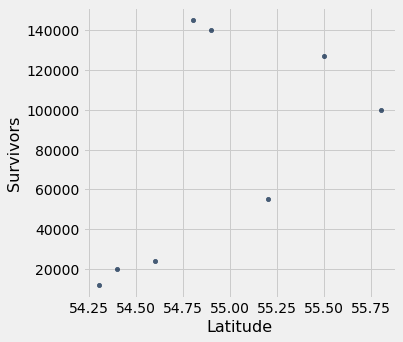

In [59]:
minard.scatter("Latitude", "Survivors")

In [ ]:
minard.scatter("Longitude", "Survivors")